### I  have chosen the Titanic data set.

### Some questions to answer:

- Who were the passengers on Titanic:
    - where did they embarked
    - their demography (age, sex, class)
    - were they with family aboard or not
    
- How many have survived and what factors helped them to survive (sex, ages, class, etc.)

###############################################################
####  INTRODUCTION: The story behind the numbers


To make a better analisys it is important to know the story behind the data. It may help to rise right questions and to make better conclusions.

So, everybody is aware about Titanic's story, but in general, people don't know a lot of details conserning it. That is why the article from Wikipedia is useful to give some light.

Source: https://en.wikipedia.org/wiki/RMS_Titanic

RMS Titanic (/taɪˈtænɪk/) was a British passenger liner that sank in the North Atlantic Ocean on 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. 

The exact number of people aboard is not known, as not all of those who had booked tickets made it to the ship. Titanic's passengers numbered approximately 1,317 people and around 885 crew members on board. The ship was considerably under capacity on her maiden voyage, as she could accommodate 2,453 passengers. 

After leaving Southampton on 10 April 1912, Titanic called at Cherbourg in France and Queenstown (now Cobh) in Ireland before heading west to New York. On 14 April, four days into the crossing, she hit an iceberg at 11:40 p.m. ship's time. Some  passengers and some crew members were evacuated in lifeboats, many of which were launched only partially loaded. A disproportionate number of men were left aboard because of a "women and children first" protocol for loading lifeboats. At 2:20 a.m., she broke apart and foundered with well over one thousand people still aboard. 

In [236]:
# The figure shows the timing of Titanic sinking
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/4/48/Sinking_of_the_RMS_Titanic_animation.gif')

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##############################################################################################################
### Wrangling phase

The data was obtained from Udacity website Intro to Programming Nanodegree for the Final Project.

### Getting familiar with the data set

In [238]:
titanic_original_dataframe = pd.read_csv("titanic_data.csv") # Read the data from titanic_data.csv file

In [239]:
titanic_original_dataframe.shape # Check the dimensions of the data set. There are 12 columns and 891 rows

(891, 12)

In [240]:
titanic_original_dataframe.dtypes # Check the variable data types

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [241]:
print(titanic_original_dataframe.describe()) # Getting statistical summary of the variables

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Some of the very first notes: 

A lot of data about age is missing. The remaining data shows that the average age of the passengers was about 30 years old. The youngest passenger was about 5 months old and the oldest was 80 years old!!!

There were 3 classes of passengers.

Some people were with a lot of family members aboard : SibSp max is 8 and Parch is 6.

It is unexpected that the min fare is "0", but for this analisys it is not an issue.

The mean value for Survived is 0.38, so only 38% of passengers were lucky enough to survive...

### Original Data Dictionary
Data Dictionary from https://www.kaggle.com/c/titanic/data

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	         Sex	

Age  	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [242]:
titanic_original_dataframe.head() # Print the head of the original data to see what it looks like

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Some columns are not necessary, so they could be removed from the data frame

It seems that "PassengerId" has no value for the current analisys purposes, it is just a number assigned to each passenger.
"Ticket" and "Fare" are note useful to answer the questions.

#### Some new columns should be created to give some better readability for the data.

"AliveDead"  provides "Perished" or "Alive" instead of 0 and 1

"SES"  gives more detailed description for each class

"Port" shows the whole name of each port instead of its first letter only

"FamilyMembers" provides the total number of family members aboard for each passenger

"Demography" introduces a new classification as boy/girl, man/woman and elder man/woman after it combines age/sex info for each passenger

"Deck" gives the info about the deck level based on Cabin info 

In [243]:
titanic_dataframe = pd.DataFrame.copy(titanic_original_dataframe) # Make a copy of the original data frame 

In [244]:
titanic_dataframe["AliveDead"] = titanic_dataframe.Survived.map({0: "Perished", 1: "Alive"}) 

In [245]:
titanic_dataframe["SES"] = titanic_dataframe.Pclass.map({ 1: "1 (Upper Class)", 2: "2 (Middle Class)", 3: "3 (Lower Class)"})

In [246]:
titanic_dataframe["Port"] = titanic_dataframe.Embarked.map({ "S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"})

In [247]:
titanic_dataframe["FamilyMembers"] = titanic_dataframe["SibSp"] + titanic_dataframe["Parch"]

In [248]:
def demography(passenger):
    """
    This function takes age and sex values as inputs and returns a new 
    classifications as boy/girl (for ages <15)  or elder man/woman (ages>60)
    It returns sex for people with ages between 15 and 60
    The age of 15 was choosen arbitrary, because of the lack of information about the "child age" definition for that time.
    """
    age,sex = passenger
    
    if age <15:
        if sex == "male":
            return "boy"
        else:
            return "girl"
    elif age >60:
        if sex == "male":
            return "elder man"
        else:
            return "elder woman"        
    else:
        if sex == "male":
            return "man"
        else:
            return "woman"  

In [249]:
titanic_dataframe["Demography"]=titanic_dataframe[["Age","Sex"]].apply(demography,axis=1) 
# separates children, elders, and women/men

In [250]:
titanic_dataframe["Deck"] = titanic_dataframe["Cabin"].fillna("unknown") 
# creats a new column for deck number(letter) based on "Cabin" names; missing values are substituted by the string "unknown"

In [251]:
def cabin_on_deck(cabin_name):
    """
    This function has as an input the string with the name of each cabin and returns its first letter as a deck level.
    Also, it cleans some unexpected values (e.x. "F E69", "T").
    All cabin_name values come from titanic_dataframe["Cabin"]. "deck" is a list where all deck levels will be stored.
    """
    deck = []
    for cabin in cabin_name:
               
        if cabin == "unknown" or cabin == "T": 
            # if cabin number is unknown, so deck is unknown; 
            # T value was spotted when the data was plotted, but it is not any reasonable name for deck level
            deck.append("unknown")                
            
        elif len(cabin)>1 and cabin[1] == " ": 
            """
            This statement checks for some unexpected cabin names like "F E69", "F G73", "F G63", "F G73", etc.
            For thees cases the third letter will be considered as a deck level
            
            """
            deck.append(cabin[2])            
            
        else:            
            deck.append(cabin[0])
        
    return deck

In [252]:
titanic_dataframe["Deck"] = pd.DataFrame(cabin_on_deck(titanic_dataframe["Deck"]))
# The output from function cabin_on_deck(cabin_name) is transformed into DataFrame to be used as a new column

In [253]:
# Establishes the column order in the new data frame to be analysed. The columns "Sex" and "Pclass" was left for some kind of analisys.
titanic_dataframe = titanic_dataframe[["AliveDead","SES","Port","Name","Demography","Age","FamilyMembers","Cabin","Deck","Sex","Pclass"]]  
# sort by the values of the following columns "SES","Name"
titanic_dataframe=titanic_dataframe.sort_values(["SES","Name"])

In [254]:
"""
Prints what it looks like after the columns were reordered what it looks like 
after the columns were created, reordered and sorted
"""
titanic_dataframe.head() 

,AliveDead,SES,Port,Name,Demography,Age,FamilyMembers,Cabin,Deck,Sex,Pclass
730,Alive,1 (Upper Class),Southampton,"Allen, Miss. Elisabeth Walton",woman,29.00,0,B5,B,female,1
305,Alive,1 (Upper Class),Southampton,"Allison, Master. Hudson Trevor",boy,0.92,3,C22 C26,C,male,1
297,Perished,1 (Upper Class),Southampton,"Allison, Miss. Helen Loraine",girl,2.00,3,C22 C26,C,female,1
498,Perished,1 (Upper Class),Southampton,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",woman,25.00,3,C22 C26,C,female,1
460,Alive,1 (Upper Class),Southampton,"Anderson, Mr. Harry",man,48.00,0,E12,E,male,1


#### VERY INTERESTING Women Names:

I found that some women names are very interesting, e.g. "Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"

Here is an explanation about married women names of that time:

Woman legal existence as an individual was suspended under ‘marital unity,’ a legal fiction in which the husband and wife were considered a single entity: the husband. As such, when married the wife would assume her husband’s name to become Mrs. his name. 

Source: https://www.huffingtonpost.com/joni-erdmann/why-are-women-still-chang_b_8486370.html

############################################################################################################



## Exploration phase:

Let's have an idea what was the general socio economic status of the Titanic's passengers.

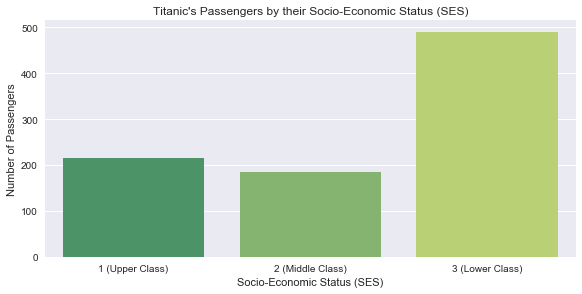

In [255]:
sns.factorplot(x="SES",data=titanic_dataframe,kind="count",aspect = 2, palette = "summer") 
# SES of passengers of Titanic
# The number of lower class passenger was more than double of those of two other classes
plt.xlabel("Socio-Economic Status (SES)")
plt.ylabel("Number of Passengers")
plt.title("Titanic's Passengers by their Socio-Economic Status (SES)")

#### Conclusion:

The most of Titanic's passengers were the 3 (Lower Class).

#### New question:

We know, that after leaving Southampton on 10 April 1912, Titanic called at Cherbourg in France and Queenstown (now Cobh) in Ireland before heading west to New York. 

So, using our data, we will try to better understand how many passengers embarked in each city and who were they.

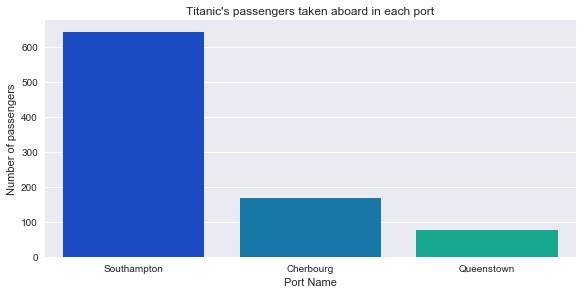

In [256]:
sns.factorplot(x="Port",data=titanic_dataframe,kind="count",aspect = 2,palette = "winter") 
# The number of passengers embarked in each port
plt.xlabel("Port Name")
plt.ylabel("Number of passengers")
plt.title("Titanic's passengers taken aboard in each port")

#### Conclusion: 
Wow, such a big difference in numbers... Why it has happend?

One of the possible explanations is that the dock facilities in Cherbourg as well as in Queenstown were not suitable for a ship of Titanic's size, and tenders were used to bring passengers aboard. (Source: Wikipedia).

So, maybe, those cities were not developped enough and their citizens had no enough money to pay a trip.

#### Question:

What about social and economic status of the passengers embarked in each city?

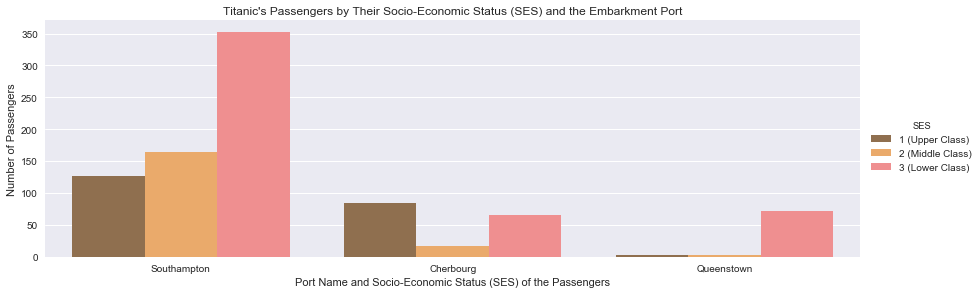

In [257]:
sns.factorplot(x="Port",data=titanic_dataframe,kind="count",hue="SES", aspect = 3,palette = "spring_d") 
# Shows social and economics aspects of the passengers embarked in each city
plt.xlabel("Port Name and Socio-Economic Status (SES) of the Passengers")
plt.ylabel("Number of Passengers")
plt.title("Titanic's Passengers by Their Socio-Economic Status (SES) and the Embarkment Port")

#### Such a different situation for each city!!! 

Personnaly, I would expect to see somewhat similar to Southampton for each city.

The most of Cherbourg passengers were Upper Class, great number of Lower Class and some of Middle Class.

For Queenstown, only few passenger were Upper or Middle Class.

Very interesting findings and they are not self-explanatory, so, some additional research is needed to understand the reasons of such distribuition. But for the moment it is out of scope of this analisys.

#### All passengers onboard. Let's discover a little bit more about them...

From the preliminary analisys it is known, that the average age of the passengers was 29-30 years old. The youngest passenger was about 5 months old and the oldest was 80 years old!!! 

#### But what about the others, how old they were ?

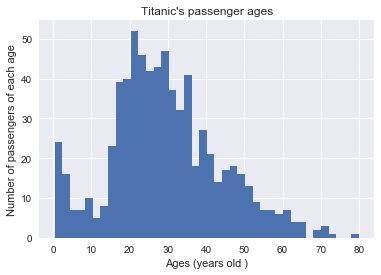

In [258]:
titanic_dataframe["Age"].hist(bins=40) 
# Since the ages are ranged between 0 and 80, bins=40 is better than standart value 
plt.xlabel("Ages (years old )")
plt.ylabel("Number of passengers of each age")
plt.title("Titanic's passenger ages")

In [259]:
np.mean(titanic_dataframe["Age"]) # Finds the avarage age of Titanic's passengers

29.69911764705882

#### Conclusion:

Overall, it seems that there were a lot of young people and young families aboard, beacause of the number of young kids and even babies.
The most part of adults were aged between 20 - 40 years, with a small number of passengers older than 60.

#### Question: 

Was this age distribuition characterstic for all classes?

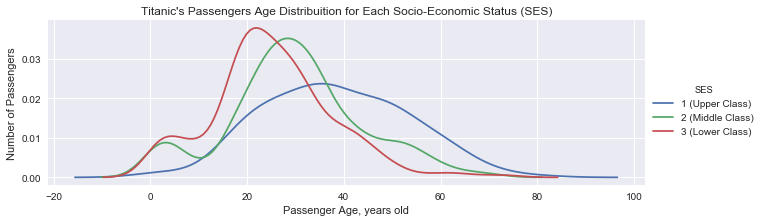

In [260]:
# Shows the relation between age distribuition for each passenger class
graph_age_class=sns.FacetGrid(titanic_dataframe,hue='SES', aspect=3)
graph_age_class.map(sns.kdeplot,'Age')
graph_age_class.add_legend()
plt.xlabel("Passenger Age, years old")
plt.ylabel("Number of Passengers")
plt.title("Titanic's Passengers Age Distribuition for Each Socio-Economic Status (SES)")

#### Conclusion:

Middle and Lower Class passnegers have age distribuitions similar to that shown on histogram. Their main difference is the averege age. The most part of Lower Class passengers were younger (20 years) than those from Middle Class (30 years). 

Upper class passsenger´s average age was about 40 years old and there were not a lot of children.

#### Question: 

Was there some age difference by sex inside the each class?

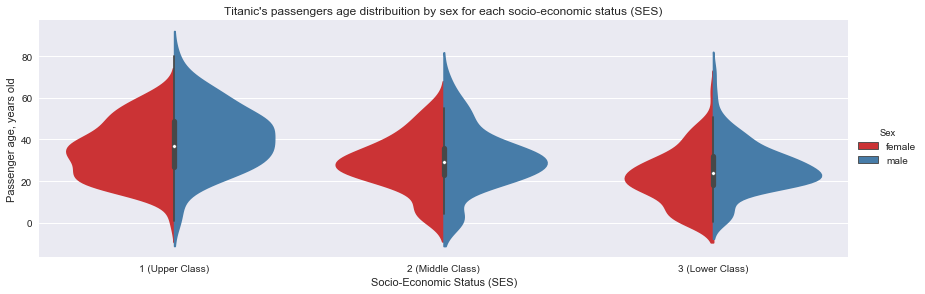

In [261]:
sns.factorplot(x="SES",data= titanic_dataframe,y="Age",hue="Sex", kind="violin",split=True,aspect=3, palette="Set1")
"""
Demonstrate the Titanic's passengers age distribution by sex and passenger class
The idea for this factorplot comes from http://seaborn.pydata.org/tutorial/categorical.html
"""  
plt.ylabel("Passenger age, years old")
plt.xlabel("Socio-Economic Status (SES)")
plt.title("Titanic's passengers age distribuition by sex for each socio-economic status (SES)")

#### Conclusion:

Middle and Lower Class passnegers had no significant difference by age between men and women. 

Upper class women in average were younger than the Upper Class men.

#### Question: 

How many men, women, children, and elders were aboard?

To answer this question it is interesting to check some statisctics.

In [262]:
titanic_dataframe["Demography"].value_counts() # counts the number of  boys, girls, elders, and women/men

man            519
woman          272
boy             39
girl            39
elder man       19
elder woman      3
Name: Demography, dtype: int64

#### Conclusion:

It is clear, that there were almost twice men than women aboard, while there was an equal number of boys and girls aged less than 15 years old. But there were 6 times more elder men than elder women (older than 60).

#### Question: 

How does this varies accordinly to each passenger class?


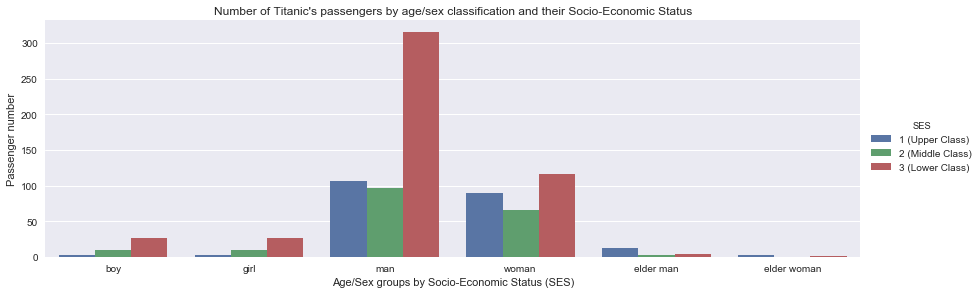

In [263]:
#Shows how many children, elders, women/men in each passenger class
sns.factorplot(x="Demography",data=titanic_dataframe,kind="count",hue='SES', aspect = 3,
              order = ["boy","girl","man","woman","elder man","elder woman"])
plt.ylabel("Passenger number")
plt.xlabel("Age/Sex groups by Socio-Economic Status (SES)")
plt.title("Number of Titanic's passengers by age/sex classification and their Socio-Economic Status")


#### Conclusion:

There is no significant difference in the number between men and women for the upper class passengers. For the middle class passengers there were about 100 men and 60-70 women. For the lower class passenger the women were only about 35% of men's number.

The most children aboard were from the lower class, only few children were from the upper class.

#### Question: 

This diference between men and women numbers drive us to a new question: "How many family members of each passenger were aboard?"


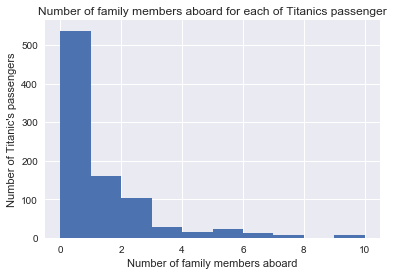

In [264]:
titanic_dataframe["FamilyMembers"].hist() # Shows how many family members of each passenger were aboard
plt.xlabel("Number of family members aboard")
plt.ylabel("Number of Titanic's passengers")
plt.title("Number of family members aboard for each of Titanics passenger")

#### Conclusion:

As expected, the majority was without any family aboard (about 550 from 891). About 160 people were with 1 family member, about 100 were with 2 family members. Despite they were not in a big number, there were some very big families aboard!!!

#### Question: 

What passenger class had bigger families aboard?


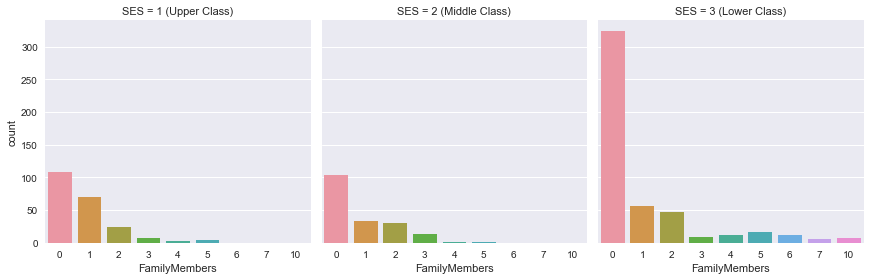

In [265]:
sns.factorplot(x="FamilyMembers",data= titanic_dataframe,kind="count",col='SES') 
# What passenger class had bigger families aboard?

#### Conclusion:

The passengers without any family member aboard were the majority in each class. 

Upper and middle class passengers had no more than 5 family members aboard. Normaly, they had up to 3 family members with them.

In the 3 (Lower Class), I suppose that the larger families as well as a great number of men, were mainly the sign of immigrants looking for better life in the USA.

#### Question: 

Is it correct to affirm that those without family were alone aboard? Probably, not!!! 

Let us check this idea by sorting the data by cabin names.


In [266]:
cabin_sorted_df=titanic_dataframe.sort_values(["Cabin"]) # sorts the cabins numbers
cabin_sorted_df.head(50) # greater number of row lets some better investigation

,AliveDead,SES,Port,Name,Demography,Age,FamilyMembers,Cabin,Deck,Sex,Pclass
583,Perished,1 (Upper Class),Cherbourg,"Ross, Mr. John Hugo",man,36.0,0,A10,A,male,1
475,Perished,1 (Upper Class),Southampton,"Clifford, Mr. George Quincy",man,NaN,0,A14,A,male,1
556,Alive,1 (Upper Class),Cherbourg,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",woman,48.0,1,A16,A,female,1
284,Perished,1 (Upper Class),Southampton,"Smith, Mr. Richard William",man,NaN,0,A19,A,male,1
599,Alive,1 (Upper Class),Cherbourg,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",man,49.0,1,A20,A,male,1
630,Alive,1 (Upper Class),Southampton,"Barkworth, Mr. Algernon Henry Wilson",elder man,80.0,0,A23,A,male,1
867,Perished,1 (Upper Class),Southampton,"Roebling, Mr. Washington Augustus II",man,31.0,0,A24,A,male,1
647,Alive,1 (Upper Class),Cherbourg,"Simonius-Blumer, Col. Oberst Alfons",man,56.0,0,A26,A,male,1
209,Alive,1 (Upper Class),Cherbourg,"Blank, Mr. Henry",man,40.0,0,A31,A,male,1
185,Perished,1 (Upper Class),Southampton,"Rood, Mr. Hugh Roscoe",man,NaN,0,A32,A,male,1


#### Conclusion:

As expected, not all the passengers without family members were "alone" aboard the Titanic, especially, when we talk about the Upper Class passengers, who, very probably, had some servants with them. 

For exemple, The Allisons boarded Titanic along with four servants: a maid, Sarah Daniels (no relation to Bess); a nurse, Alice Cleaver; a cook, Amelia Mary Brown (Mildred); and a butler, George Swane. Hudson and Bess occupied cabin C-22, Sarah and Loraine occupied C-24, and Alice and Trevor occupied C-26. Two second-class cabins were also booked for George and Mildred. (Source: https://en.wikipedia.org/wiki/Allison_family)

Also, it is necessary to take in consideration, that tants, oncles, cousins, mistresses and fiancés, as well, as other more distant relatives were not considered as family members in the original data set.

Let us see some examples that prove that "without family" doesn't mean "alone":

CABIN B28:

shared by two women without close family members related, their family names are different, ages are significantly different

CABIN B35:

shared by two women without close family members related, their family names are different, ages are similar

CABIN C124:

shared by two men without close family members related, their family names are different

CABIN C125:

shared by two women, but only one without close family members related, their family names are different, ages are significantly different

#### Question: 

It would be interesting to make some correlations between the people without family and the fact of shared cabins, but it is almost impossible to do because a lot of data is missing (almost 2/3 of values are nulls). Probably, there were no means to identify the cabin numbers of people who died.

Maybe it is possible to have some other insights with the remaining data? For example, it is possible to proceed with the value counts for cabin names.


In [267]:
titanic_dataframe["Cabin"].isnull().sum() # Chek for the number of the missing values

687

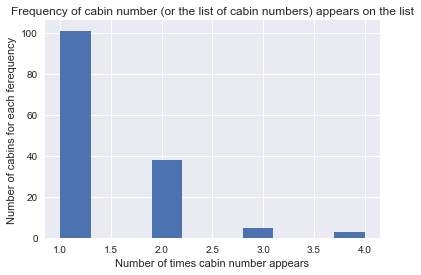

In [268]:
cabins_occupation = titanic_dataframe["Cabin"].value_counts() # value counts for cabin names (variable cabins_occupation)
cabins_occupation.hist() # number of times each cabin names appears in the data
plt.xlabel("Number of times cabin number appears")
plt.ylabel("Number of cabins for each ferequency")
plt.title("Frequency of cabin number (or the list of cabin numbers) appears on the list")

#### Conclusion:

The interpretation of this figure doesn't not  give any precise information by what number of persons each cabin was occupied, because for some families a repeated list of cabin numbers was given for each family member (e.g. "C23 C25 C27", "B96 B98"), but without any additional information. So, the columns of 3 or 4 repetitions (and some of 2 repetions) normally belong to this kind of occupation.

#### Question: 

Now it is more or less clear who were the people aboard of Titanic. The question is, who was lucky enough to survive the disaster? 

So, let's start with the deck levels factor.

In [269]:
(titanic_dataframe["Deck"]).value_counts()


unknown    688
C           59
B           47
E           33
D           33
A           15
F            9
G            7
Name: Deck, dtype: int64

#### Conclusion:

Unfortunatelly, a lot of data is missing. Nevertheless, it is clear that the lower levels (more closest to the waterline) have less data.

#### Question:

First of all, the deck level should be somehow related to the passenger class, but how it was related on Titanic?

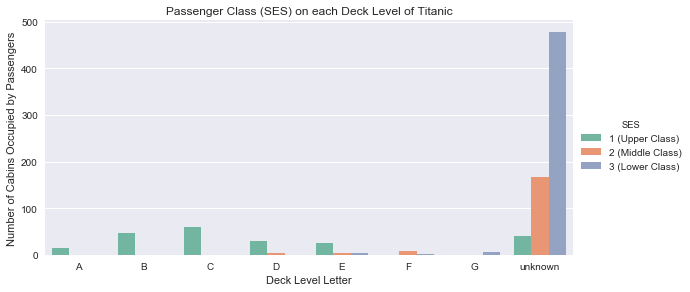

In [270]:
sns.factorplot(x="Deck",data= titanic_dataframe,kind="count", palette="Set2", aspect = 2, hue = "SES",
              order = ["A","B", "C", "D", "E", "F", "G", "unknown"])
plt.ylabel("Number of Cabins Occupied by Passengers")
plt.xlabel("Deck Level Letter")
plt.title("Passenger Class (SES) on each Deck Level of Titanic")

#### Conclusion:

Unfortunatally, a lot of data is missing. Nevertheless, it is clear that the lowers levels (more closest to the water line) were those of the 3(Lower Class) and that is were we have less data.

The levels from A to D were occupied by the 1 (Upper Class) passengers with a few records of 2(Middle Class) passengers on the D level.

Level E was a very mixed level were all of three passenger classes were presented.

Further levels has no a lot of information, probably because there were not enough survivers.

#### Question:

For clearer understanding of how the deck level was important to survive, it is intersting to look at Titanic's deck levels plan.

In [271]:
# The figure shows the deck plan of Titanic 

Image(url='https://i.pinimg.com/600x315/dd/a4/49/dda4498b1eebd33411b4b1b5b14774d6.jpg')

#### Conclusion:

Boat Deck was close to the A deck level and it was located in the middle of the ship. 

As far as the boat were filled by the rule "First come, first served" + "Women and children first", it is understandable, that Upper Class women and children were in very priviledged circumstances.

#### Question:

Let's check the "Women and children first" rule results on the plots.

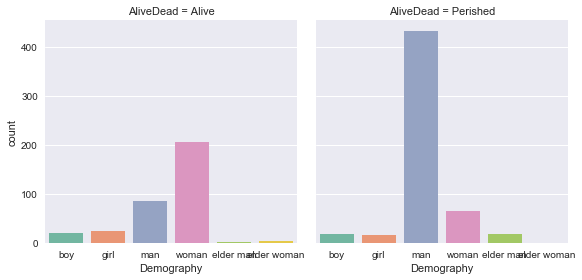

In [272]:
sns.factorplot(x="Demography",data= titanic_dataframe,kind="count",col='AliveDead', 
               palette="Set2",order = ["boy","girl","man","woman","elder man","elder woman"])
# compare the number of survivors and perished for each category man/woman, etc.


#### Conclusion:

It is evident, that the most of people who did not survive were men. That is coherent with the order given on that occasion: "Women and children first". 

#### Question: 

It is interesting to check how does the rates of survivors vary for each passenger class...


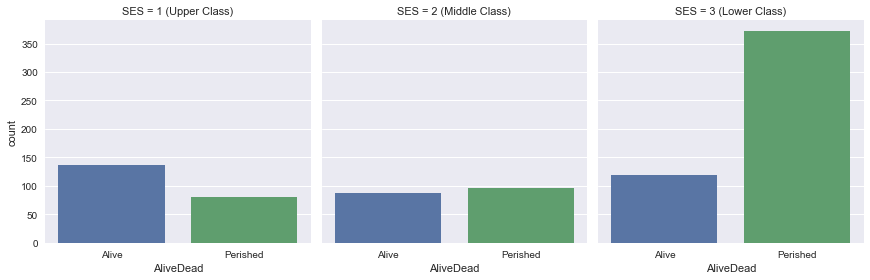

In [273]:
sns.factorplot(x="AliveDead",data= titanic_dataframe,kind="count",col='SES')

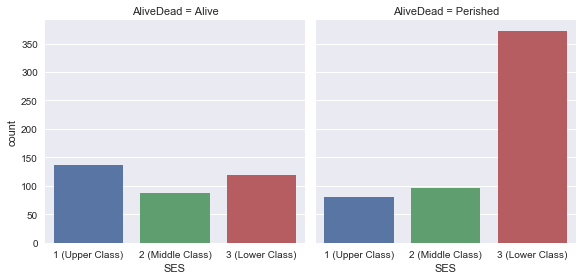

In [274]:
sns.factorplot(x="SES",data= titanic_dataframe,kind="count",col='AliveDead')
# survivers versus not survivers numbers for each passenger class

#### Conclusion:

Considering the rule of "Women and children first", the number of victims for each class is coherent with the number of men in each class. 

#### Question: 

Did there occure some kind of discrimination by social status?


### Final Conclusion:

Being child or woman hospedated close to the safety boat deck were the main factors to become a survivor of Titanic disaster.

Since the number of survivors from the Lower Class is higher than that of those from the Middle Class and considering that a lot of the Upper Class and the Middle Class passengers perished, it doesn't seem to me, there was some kind of social discrimination during the boarding to the safe boats. 

We should not ignore that the number of safety boats was limited, so, there was not enough places for all passengers. On the other hand, the Lower Class passengers represented more than 50% of all passengers. The first boats were loaded partially filled, maybe for the reason nobody knew how much time they had before thinking, they were harried up to put all the boats into the water. Probably, the Upper Class men who survived were those who were let to enter the boats while there were no women and children on the deck during the boarding.

Considering the distances from the boat deck to the places where the Middle Class and Lower Class were hosted and considering that many of them probably were sleeping (Titanic hit an iceberg at 11:40 p.m. ship's time) and that Titanic was considered "unsinkable" and, finally, it took only 2h40 to sink, so it was hard for the Lower Class passengers (especially for those with kids) not to be late for their chance to obtain a seat in one of the boat.

The time factor was realy very important. Some people lost a lot time trying to find their family members, as it occured to the  Allison family (https://en.wikipedia.org/wiki/Allison_family). While trying to find their son they lost a lot of time and the opportunity to be saved. Bess was one of only four first-class women who perished, while Loraine was the only child of first and second class to do so. When I have organised the data set by passenger name, their family name was the secon one. It came to my attention that baby has survived but not his mother, nor little sister. That is why I have found their story.

It seems, that some women have prefered to stay with their husbands, as it was the case of Ida Strauss https://en.wikipedia.org/wiki/Ida_Straus. At her case, as the story tells us, it was a true love, but for other women at that time, they were very dependent from the man to sustain the family.


### To finish:
Here are two last figures. The first one shows the number of Titanic survivors and victims accordinly to their age and Socio-Economic Status and the second one shows the bottom line of this story.

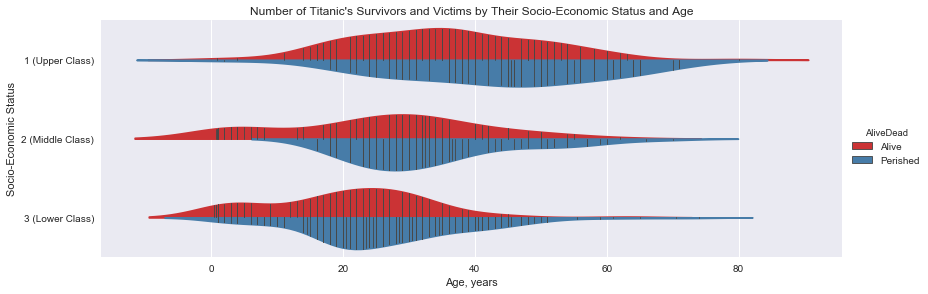

In [275]:
sns.factorplot(x="Age",data= titanic_dataframe,y="SES",hue="AliveDead", kind="violin",split=True,inner="stick", 
               palette="Set1", aspect=3)
# this factorplot idea comes from http://seaborn.pydata.org/tutorial/categorical.html
plt.ylabel("Socio-Economic Status")
plt.xlabel("Age, years")
plt.title("Number of Titanic's Survivors and Victims by Their Socio-Economic Status and Age")


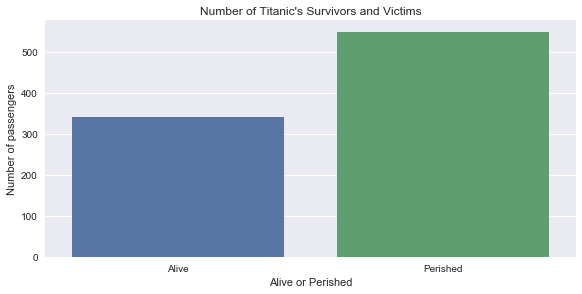

In [276]:
sns.factorplot(x="AliveDead",data= titanic_dataframe,kind="count", aspect = 2)
plt.ylabel("Number of passengers")
plt.xlabel("Alive or Perished")
plt.title("Number of Titanic's Survivors and Victims")

## A list of Web sites, books, forums, blog posts, github repositories :

The only examples I  used as the references were:

    1. https://github.com/jmportilla/Udemy-notes/blob/master/Intro%20to%20Data%20Projects%20-%20Titanic.ipynb
    Nevertheless, my analisys is much more detailed in several points and my conclusions sometimes are not the same.

    2. http://seaborn.pydata.org/tutorial/categorical.html

    3. Course notes from Introduction to Programming Nanodegree Program ("IPND Program") Udacity.

    4. https://en.wikipedia.org/wiki/RMS_Titanic


## Improvement Suggestion, including for the data set choice:

In the description of the data set Udacity team has written the following:

"Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic."

In fact, the data set from Udacity Nanodegree as well as that from https://www.kaggle.com/c/titanic/data gives the information about the passengers ONLY. No data on crew  is given in the data set (almost all of of them perished).

In fact, as far as I understood, the original data set from Titanic passengers was splitted by Kaggle into 2 sets of data  (for training and for test)  for machine learning purposes. Since, this is not a goal of this Nanodegree Final Project, why Udacity have not chosen the whole set of ALL Titanic's passengers? Personnaly, I would prefer to analyse more complet data set (and I did so to indulge my curiosity out of the scope of this report) .

For exemple, I found 1 data set here: http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls